### 지도학습 - 회귀 EX-1

#### Diamonds Dataset을 이용한 가격 예측 모델 구현

In [142]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
# 1. 데이터 수집
df = pd.read_csv('diamonds.csv')

# 데이터셋 구조 확인
print("\n=== 데이터셋 ===\n")
print(df.head())

# 데이터셋 정보 확인
print("\n=== 데이터셋 정보 ===\n")
print(df.info())

# 결측치 확인
print("\n=== 결측치 ===\n")
print(df.isnull().sum())

# 기술 통계량 확인
print("\n=== 기술 통계량 ===\n")
print(df.describe())


=== 데이터셋 ===

   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  

=== 데이터셋 정보 ===

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-nul

In [144]:
# 2. 데이터 전처리

# 불필요한 열 제거
df.drop(columns=['Unnamed: 0'], inplace=True)

# 범주형 변수 인코딩
categorical_features = ['cut', 'color', 'clarity']
numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

# 3. 데이터 분할
X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

# 파이프라인 생성
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

In [145]:
# 4. 모델 정의
# 선형 회귀 모델
model = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]
)


In [146]:
# 5. 모델 학습
model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [147]:
# 6. 모델 예측
y_pred = model.predict(X_test)

In [148]:
# 7. 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("=== 모델 평가 ===")
print(f"평균 제곱 오차 (MSE): {mse}")
print(f"결정 계수 (R^2): {r2}")


=== 모델 평가 ===
평균 제곱 오차 (MSE): 1288705.477851676
결정 계수 (R^2): 0.9189331350419386


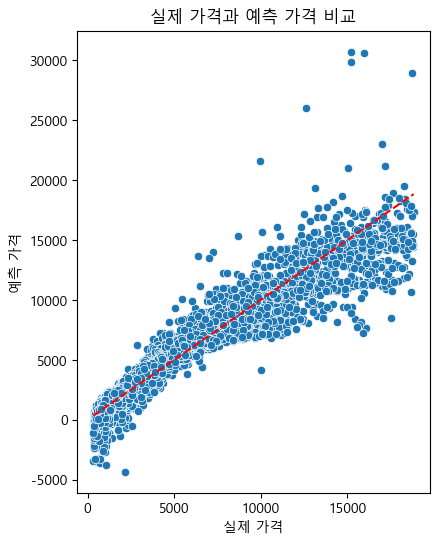

In [149]:
# 8. 결과 시각화

# 한글 폰트 설정
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred)
plt.title("실제 가격과 예측 가격 비교")
plt.xlabel('실제 가격')
plt.ylabel('예측 가격')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.show()

In [150]:
# 7. 새로운 데이터 예측
new_data = pd.DataFrame({
    'carat': [0.5, 1.0],
    'cut': ['Ideal', 'Premium'],
    'color': ['E', 'G'],
    'clarity': ['VS1', 'SI1'],
    'depth': [61.5, 62.0],
    'table': [55.0, 57.0],
    'x': [3.95, 6.50],
    'y': [3.98, 6.52],
    'z': [2.43, 4.00]
})

print("=== 새로운 데이터 예측 ===")
predictions = model.predict(new_data)
print(predictions)

=== 새로운 데이터 예측 ===
[3574.22981225 5233.39891985]


### 지도학습 - 회귀 EX-2

#### Red Wine Quality Dataset을 이용한 와인 품질 예측 모델 구현

In [151]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
# 1. 데이터 수집
df = pd.read_csv('winequality-red.csv')

# 데이터셋 구조 확인
print("\n=== 데이터셋 ===\n")
print(df.head())

# 데이터셋 정보 확인
print("\n=== 데이터셋 정보 ===\n")
print(df.info())

# 결측치 확인
print("\n=== 결측치 ===\n")
print(df.isnull().sum())

# 기술 통계량 확인
print("\n=== 기술 통계량 ===\n")
print(df.describe())


=== 데이터셋 ===

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2    

In [153]:
# 2. 데이터 전처리 

# 수치형 변수 목록
numeric_features = [
    'fixed acidity', 'volatile acidity', 'citric acid', 
    'residual sugar', 'chlorides', 'free sulfur dioxide', 
    'total sulfur dioxide', 'density', 'pH', 'sulphates', 
    'alcohol'
]

# 3. 데이터 분할
X = df.drop(columns=['quality'])
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

# 파이프라인 생성
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
    ]
)


In [154]:
# 4. 모델 정의

# 선형 회귀 모델
model = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]
)   

In [155]:
# 4. 모델 학습
model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [156]:
# 5. 모델 예측
y_pred = model.predict(X_test)

In [157]:
# 6. 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("=== 모델 평가 ===")
print(f"평균 제곱 오차 (MSE): {mse}")
print(f"결정 계수 (R^2): {r2}")

=== 모델 평가 ===
평균 제곱 오차 (MSE): 0.39002514396395493
결정 계수 (R^2): 0.4031803412796219


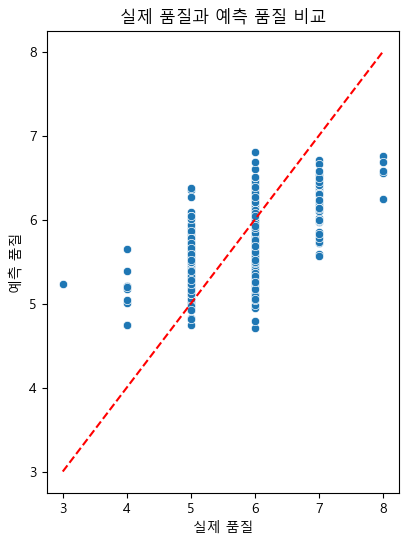

In [158]:
# 7. 결과 시각화
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred)
plt.title("실제 품질과 예측 품질 비교")
plt.xlabel('실제 품질')
plt.ylabel('예측 품질')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


In [159]:
# 7. 새로운 데이터 예측
new_data = pd.DataFrame({
    'fixed acidity': [7.4, 7.8],
    'volatile acidity': [0.7, 0.88],
    'citric acid': [0, 0],
    'residual sugar': [1.9, 2.6],
    'chlorides': [0.076, 0.075],
    'free sulfur dioxide': [11, 25],
    'total sulfur dioxide': [34, 67],
    'density': [0.9978, 0.9968],
    'pH': [3.51, 3.20],
    'sulphates': [0.56, 0.68],
    'alcohol': [9.4, 9.8]
})

print("=== 새로운 데이터 예측 ===")
predictions = model.predict(new_data)
print(predictions)

=== 새로운 데이터 예측 ===
[5.04834495 5.18835288]
